## 说明

请按照填空顺序编号分别完成 参数优化，不同基函数的实现

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def load_data(filename):
    """载入数据。"""
    xys = []
    with open(filename, 'r') as f:
        for line in f:
            xys.append(map(float, line.strip().split()))
        xs, ys = zip(*xys)
        return np.asarray(xs), np.asarray(ys)

## 不同的基函数 (basis function)的实现 填空顺序 2

请分别在这里实现“多项式基函数”以及“高斯基函数”

其中以及训练集的x的范围在0-25之间

In [13]:
def identity_basis(x):
    ret = np.expand_dims(x, axis=1)
    return ret

def multinomial_basis(x, feature_num=10):
    '''多项式基函数'''
    x = np.expand_dims(x, axis=1) # shape(N, 1)
    #==========
    #todo '''请实现多项式基函数'''
    #==========
    ret = np.array([[t ** i for i in range(feature_num)] for t in x])
    ret = np.squeeze(ret)
    return ret

def gaussian_basis(x, feature_num=10):
    '''高斯基函数'''
    #==========
    #todo '''请实现高斯基函数'''
    #==========
    centers = np.linspace(0, 25, feature_num) # (25 - 0) / (feature_num - 1) = 2.78
    width = 1.0 * (centers[1] - centers[0])
    x = np.expand_dims(x, axis=1)
    x = np.concatenate([x]*feature_num, axis=1)
    
    out = (x-centers)/width
    ret = np.exp(-0.5 * out ** 2)
    return ret

## 返回一个训练好的模型 填空顺序 1 用最小二乘法进行模型优化 
## 填空顺序 3 用梯度下降进行模型优化
> 先完成最小二乘法的优化 (参考书中第二章 2.3中的公式)

> 再完成梯度下降的优化   (参考书中第二章 2.3中的公式)

在main中利用训练集训练好模型的参数，并且返回一个训练好的模型。

计算出一个优化后的w，请分别使用最小二乘法以及梯度下降两种办法优化w

In [14]:
def main(x_train, y_train):
    """
    训练模型，并返回从x到y的映射。
    
    """
    basis_func = multinomial_basis
    phi0 = np.expand_dims(np.ones_like(x_train), axis=1)
    phi1 = basis_func(x_train)
    phi = np.concatenate([phi0, phi1], axis=1)
    w = np.dot(np.linalg.pinv(phi), y_train)
    print(phi, phi.shape)
    print(w, w.shape)
    #==========
    #todo '''计算出一个优化后的w，请分别使用最小二乘法以及梯度下降两种办法优化w'''
    #==========
    
    def f(x):
        phi0 = np.expand_dims(np.ones_like(x), axis=1)
        phi1 = basis_func(x)
        phi = np.concatenate([phi0, phi1], axis=1)
        y = np.dot(phi, w)
        return y

    return f

## 评估结果 
> 没有需要填写的代码，但是建议读懂

(300,)
(200,)
[[1.00000000e+00 2.65000000e+00 7.02250000e+00 ... 2.43201916e+03
  6.44485077e+03 1.70788545e+04]
 [1.00000000e+00 4.70000000e+00 2.20900000e+01 ... 2.38112867e+05
  1.11913047e+06 5.25991322e+06]
 [1.00000000e+00 1.42500000e+01 2.03062500e+02 ... 1.70027400e+09
  2.42289046e+10 3.45261890e+11]
 ...
 [1.00000000e+00 5.20000000e+00 2.70400000e+01 ... 5.34597285e+05
  2.77990588e+06 1.44555106e+07]
 [1.00000000e+00 1.01000000e+01 1.02010000e+02 ... 1.08285671e+08
  1.09368527e+09 1.10462213e+10]
 [1.00000000e+00 1.55000000e+00 2.40250000e+00 ... 3.33160562e+01
  5.16398870e+01 8.00418249e+01]] (300, 11)
[-2.55903079e+00  1.55236788e+01 -1.10779425e+01  3.24309903e+00
 -4.39915295e-01  2.34924777e-02  7.76423932e-04 -1.76443600e-04
  9.84838219e-06 -2.49600598e-07  2.46515178e-09] (11,)
训练集预测值与真实值的标准差：1.5
预测值与真实值的标准差：1.6


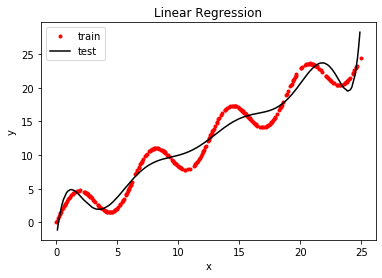

In [15]:
def evaluate(ys, ys_pred):
    """评估模型。"""
    std = np.sqrt(np.mean(np.abs(ys - ys_pred) ** 2))
    return std

# 程序主入口（建议不要改动以下函数的接口）
if __name__ == '__main__':
    train_file = 'train.txt'
    test_file = 'test.txt'
    # 载入数据
    x_train, y_train = load_data(train_file)
    x_test, y_test = load_data(test_file)
    print(x_train.shape)
    print(x_test.shape)

    # 使用线性回归训练模型，返回一个函数f()使得y = f(x)
    f = main(x_train, y_train)

    y_train_pred = f(x_train)
    std = evaluate(y_train, y_train_pred)
    print('训练集预测值与真实值的标准差：{:.1f}'.format(std))
    
    # 计算预测的输出值
    y_test_pred = f(x_test)
    # 使用测试集评估模型
    std = evaluate(y_test, y_test_pred)
    print('预测值与真实值的标准差：{:.1f}'.format(std))

    #显示结果
    plt.plot(x_train, y_train, 'ro', markersize=3)
#     plt.plot(x_test, y_test, 'k')
    plt.plot(x_test, y_test_pred, 'k')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Linear Regression')
    plt.legend(['train', 'test', 'pred'])
    plt.show()